### LSTM prediction, univariate, multi-step
cf. https://www.youtube.com/watch?v=HeQpGKNqkcs&list=PLc2rvfiptPSR3iwFp1VHVJFK4yAMo0wuF&index=19

Dataset: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

Download: https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from numpy import nan

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [21]:
data = pd.read_csv('data/household_power_consumption.txt', sep=';', 
                   parse_dates=True, low_memory=False)

In [15]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [22]:
data['date_time'] = data['Date'].str.cat(data['Time'], sep=' ')
data.drop(['Date', 'Time'], inplace=True, axis = 1)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [23]:
data.set_index(['date_time'], inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
16/12/2006 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
16/12/2006 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
16/12/2006 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
16/12/2006 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [24]:
data.replace('?', nan, inplace=True)

In [26]:
data = data.astype('float')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7+ MB


In [28]:
np.isnan(data).sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [30]:
def fill_missing(data):
    one_day = 24 * 60
    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            if np.isnan(data[row][col]):
                data[row][col] = data[row - one_day][col]

In [31]:
fill_missing(data.values)

In [33]:
np.isnan(data).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [34]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089418e+00,1.236871e-01,2.408364e+02,4.618401e+00,1.118474e+00,1.291131e+00,6.448635e+00
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [35]:
data.shape

(2075259, 7)

In [36]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### Prepare power consumption for each day

In [37]:
data.to_csv('data/cleaned_household_power_consumption.csv')

In [38]:
dataset = pd.read_csv('data/cleaned_household_power_consumption.csv', parse_dates=True, index_col='date_time', low_memory=False)

In [39]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [40]:
dataset.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


### Let's do EDA

In [41]:
data = dataset.resample('D').sum()

In [42]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


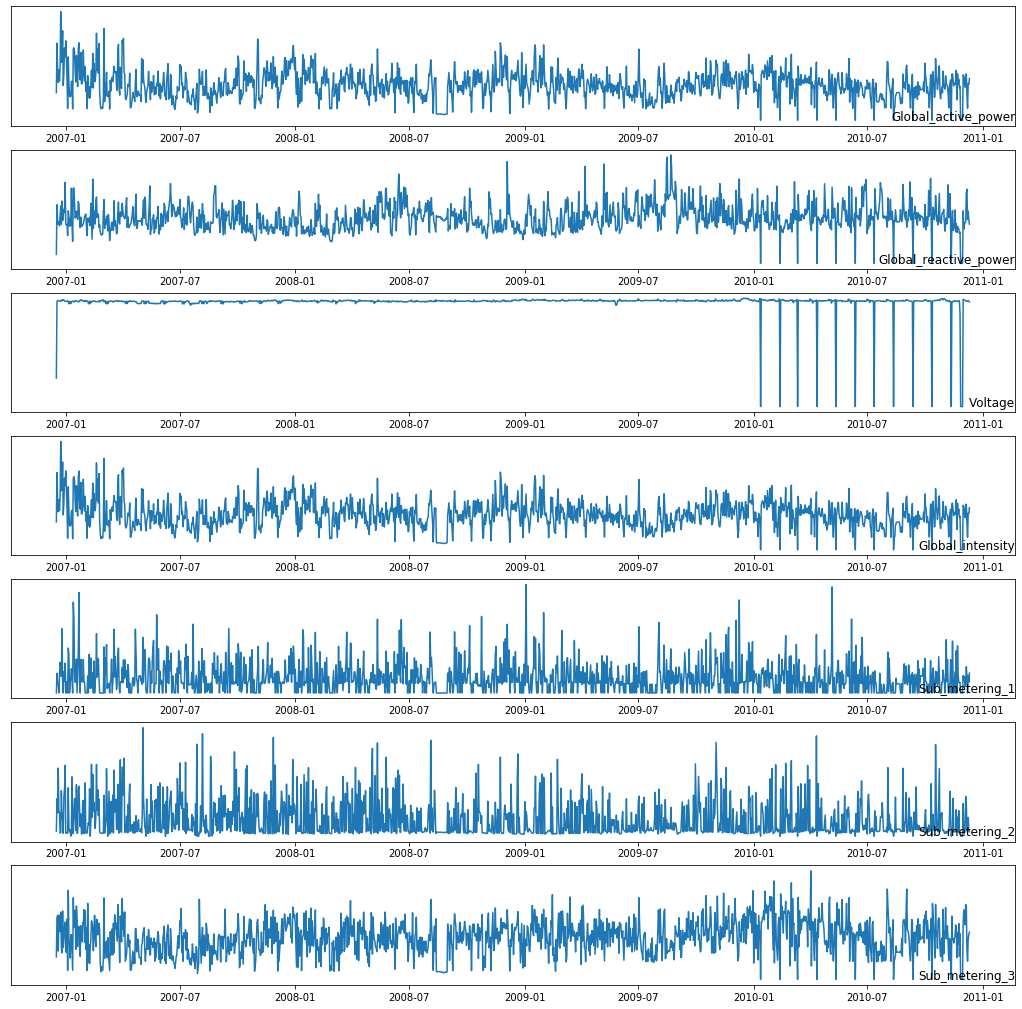

In [45]:
fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()

### Exploring active power consumption for each year

In [46]:
years = ['2007', '2008', '2009', '2010']

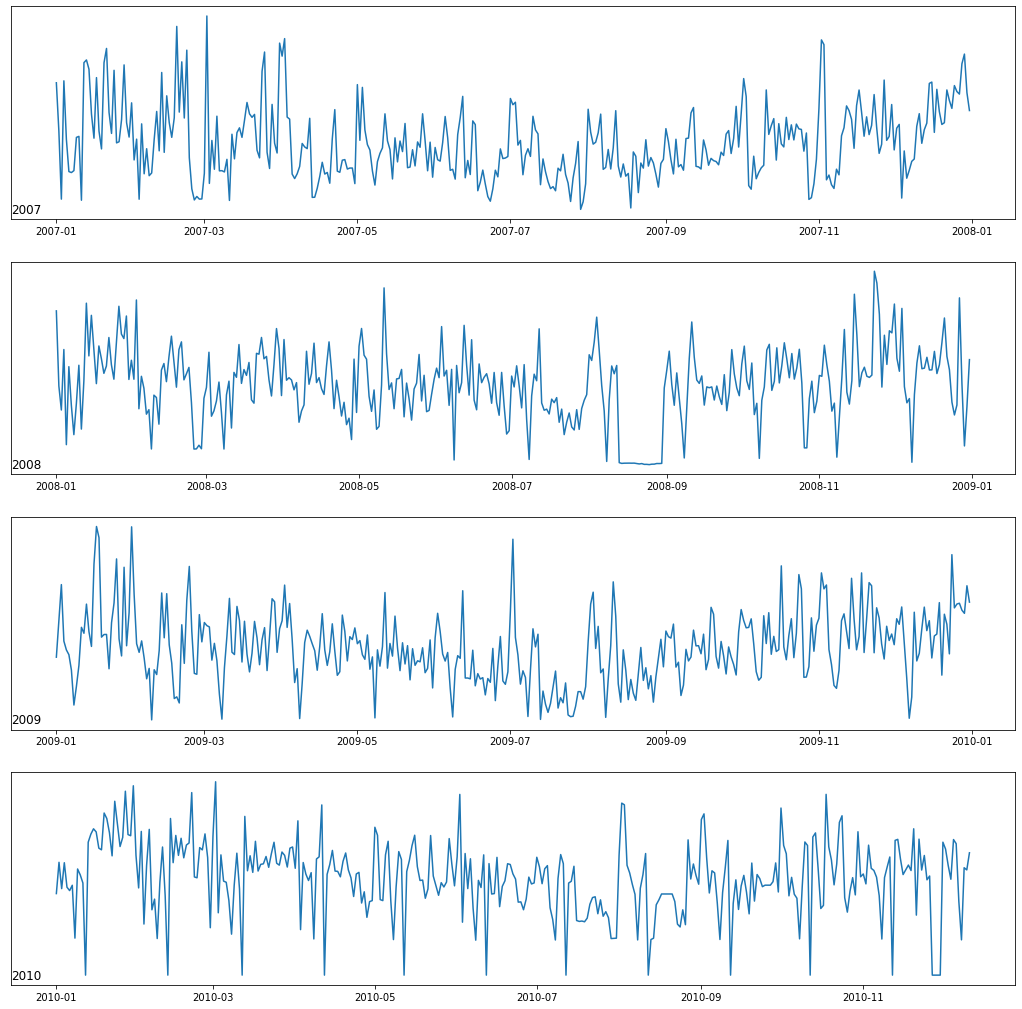

In [48]:
 fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years [i]
    active_power_data = data[str(year)]
    plt.plot(active_power_data['Global_active_power'])
    plt.title(str(year), y=0, loc = 'left')
    plt.yticks([])
plt.show()
fig.tight_layout()

### Power consumption distribution with histogram

#### hist for active power

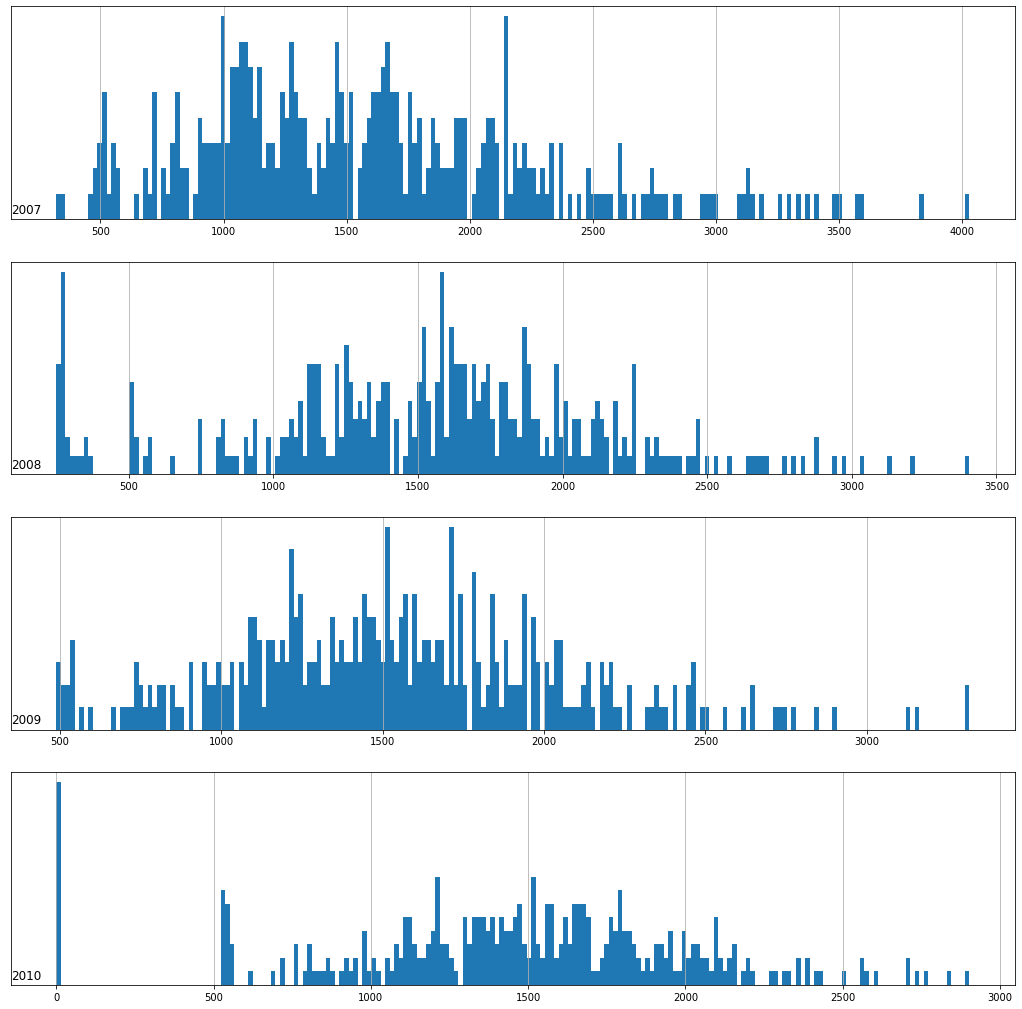

In [58]:
fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years [i]
    active_power_data = data[str(year)]
    active_power_data['Global_active_power'].hist(bins= 200)
    plt.title(str(year), y=0, loc = 'left')
    plt.yticks([])
plt.show()
fig.tight_layout()

#### hist for full data

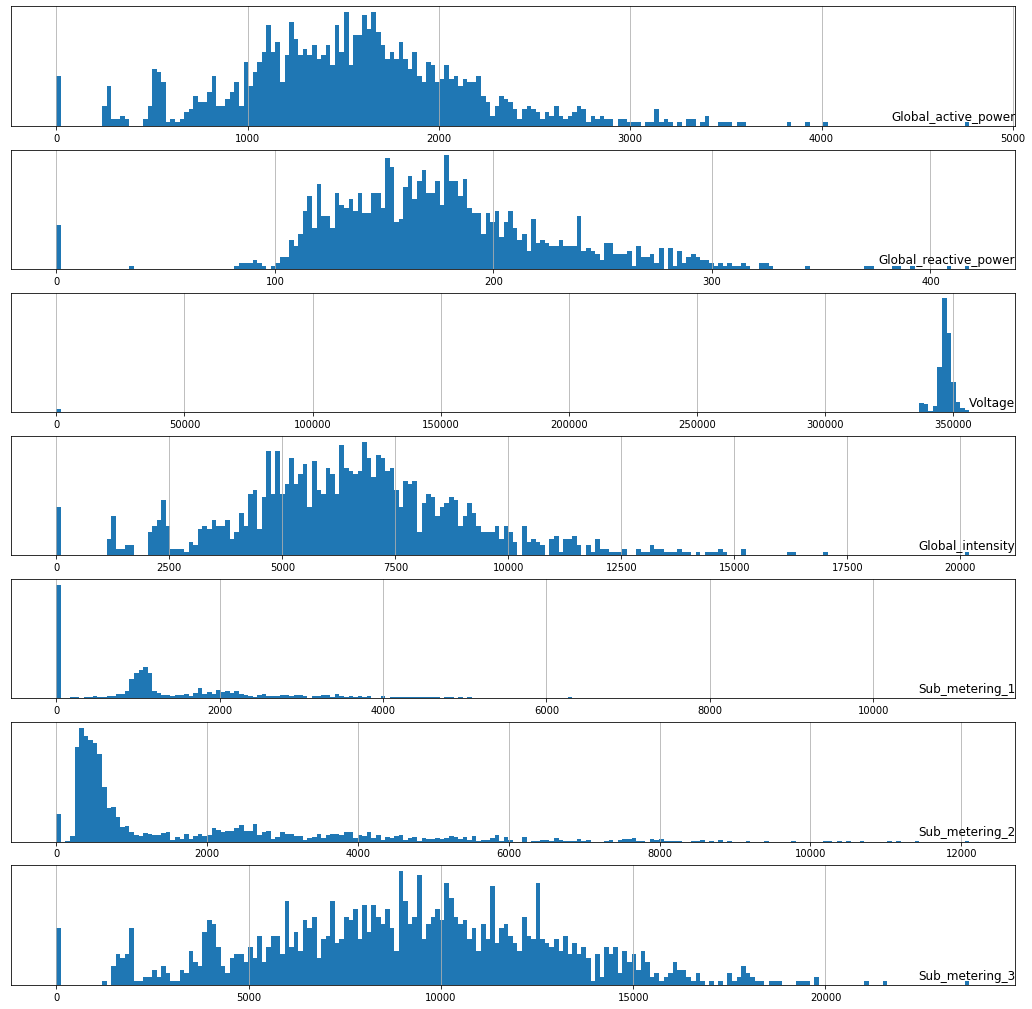

In [60]:
fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name = data.columns[i]
    data[name].hist(bins = 200)
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()

### plot power consumption hist for each month of 2007

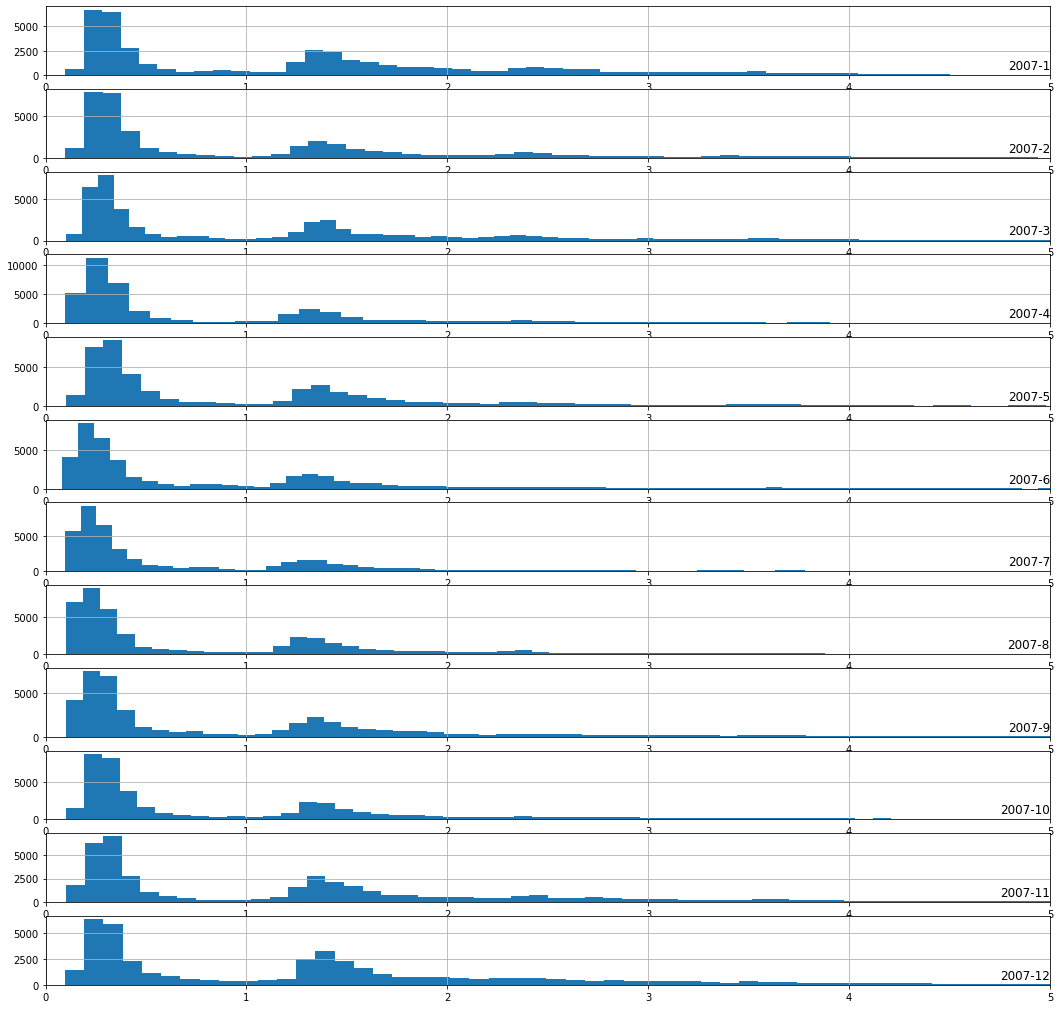

In [74]:
months = [i for i in range(1,13)]

fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i+1)
    month = '2007-' + str(months[i])
    active_power_data = dataset[month]
    active_power_data['Global_active_power'].hist(bins= 100)
    ax.set_xlim(0,5)
    plt.title(month, y=0, loc = 'right')
plt.show()
fig.tight_layout()

In [75]:
dataset['2007-' + str(months[3])]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2007-04-01 00:00:00,0.850,0.046,242.61,3.6,0.0,0.0,0.0
2007-04-01 00:01:00,0.742,0.000,242.57,3.2,0.0,0.0,0.0
2007-04-01 00:02:00,0.906,0.000,243.35,3.8,0.0,0.0,0.0
2007-04-01 00:03:00,0.606,0.046,243.16,2.6,0.0,0.0,0.0
2007-04-01 00:04:00,0.538,0.046,243.29,2.2,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2007-04-12 23:55:00,0.562,0.000,245.92,2.6,0.0,0.0,0.0
2007-04-12 23:56:00,0.514,0.000,245.15,2.4,0.0,0.0,0.0
2007-04-12 23:57:00,0.558,0.000,244.89,2.6,0.0,0.0,0.0


### active power uses prediction
- forecast hourly for next day
- forecast daily  for next week
- forecast daily for next month
- forecast monthly for next year

In [ ]:
# forecast daily for next week
# [Week1] -> Week2
# [Week2] -> Week3

# Given recent power consumption, what is the expected power consumption for the week ahead?



In [76]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [78]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0
2010-12-11,1836.822,151.144,343926.57,7826.2,2054.0,489.0,10308.0


In [89]:
data_train = data.loc[:'2009-12-31',:]['Global_active_power']
data_train.tail()

date_time
2009-12-27    2195.452
2009-12-28    2094.098
2009-12-29    2047.968
2009-12-30    2451.110
2009-12-31    2211.892
Freq: D, Name: Global_active_power, dtype: float64

In [87]:
data_test = data['2010']['Global_active_power']
data_test.tail()

date_time
2010-12-07    1109.574
2010-12-08     529.698
2010-12-09    1612.092
2010-12-10    1579.692
2010-12-11    1836.822
Freq: D, Name: Global_active_power, dtype: float64

In [91]:
data_train.shape, data_test.shape

((1112,), (345,))

### Prepare training data

In [93]:
data_train.head(14)

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
2006-12-21    1723.288
2006-12-22    2341.338
2006-12-23    4773.386
2006-12-24    2550.012
2006-12-25    2743.120
2006-12-26    3934.110
2006-12-27    1528.760
2006-12-28    2072.638
2006-12-29    3174.392
Freq: D, Name: Global_active_power, dtype: float64

In [94]:
data_train = np.array(data_train)

In [95]:
X_train, y_train = [], []

for i in range(7, len(data_train) - 7):
    X_train.append(data_train[i-7:i])  # past 7 days
    y_train.append(data_train[i:i+7])  # next 7 days

In [96]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [98]:
X_train.shape, y_train.shape

((1098, 7), (1098, 7))

In [100]:
X_train[0], y_train[0]

(array([1209.176, 3390.46 , 2203.826, 1666.194, 2225.748, 1723.288,
        2341.338]),
 array([4773.386, 2550.012, 2743.12 , 3934.11 , 1528.76 , 2072.638,
        3174.392]))

In [106]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6
0,0.211996,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304
1,0.694252,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000
2,0.431901,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439
3,0.313037,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133
4,0.436748,0.325660,0.462304,1.000000,0.508439,0.551133,0.814446
...,...,...,...,...,...,...,...
1093,0.417528,0.341484,0.373598,0.253052,0.324310,0.330396,0.432014
1094,0.341484,0.373598,0.253052,0.324310,0.330396,0.432014,0.197623
1095,0.373598,0.253052,0.324310,0.330396,0.432014,0.197623,0.394568
1096,0.253052,0.324310,0.330396,0.432014,0.197623,0.394568,0.362081


In [103]:
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

In [104]:
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [108]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # 1 feature only
X_train.shape

(1098, 7, 1)

### Build LSTM Model

In [110]:
regressor = Sequential()

num_features = 1  # open, high, low, close, volume
# units            -> dimension of latent state vector of LSTM cell ~ capacity/#weights of LSTM cell
# return_sequences -> True so that all hidden states h_t (i.e. entire sequence) get passed to the next LSTM layer for it
#                     to process the entire sequence as well
regressor.add(LSTM(units = 200, activation = 'relu', input_shape = (X_train.shape[1], num_features)))

regressor.add(Dense(units = 7))

In [111]:
regressor.compile(loss='mse', optimizer='adam')

In [112]:
regressor.fit(X_train, y_train, epochs=100)

Train on 1098 samples
Epoch 1/100
1098/1098 [==============================] - 2s 2ms/sample - loss: 0.0600
Epoch 2/100
1098/1098 [==============================] - 0s 432us/sample - loss: 0.0246
Epoch 3/100
1098/1098 [==============================] - 0s 377us/sample - loss: 0.0242
Epoch 4/100
1098/1098 [==============================] - 1s 512us/sample - loss: 0.0241
Epoch 5/100
1098/1098 [==============================] - 1s 740us/sample - loss: 0.0240
Epoch 6/100
1098/1098 [==============================] - 1s 545us/sample - loss: 0.0239
Epoch 7/100
1098/1098 [==============================] - 1s 610us/sample - loss: 0.0240
Epoch 8/100
1098/1098 [==============================] - 1s 561us/sample - loss: 0.0242
Epoch 9/100
1098/1098 [==============================] - 1s 669us/sample - loss: 0.0239
Epoch 10/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0239
Epoch 11/100
1098/1098 [==============================] - 1s 913us/sample - loss: 0.0237
Epoch 12/100

1098/1098 [==============================] - 1s 558us/sample - loss: 0.0228
Epoch 93/100
1098/1098 [==============================] - 1s 698us/sample - loss: 0.0229
Epoch 94/100
1098/1098 [==============================] - 1s 681us/sample - loss: 0.0230
Epoch 95/100
1098/1098 [==============================] - 1s 651us/sample - loss: 0.0229
Epoch 96/100
1098/1098 [==============================] - 1s 488us/sample - loss: 0.0228
Epoch 97/100
1098/1098 [==============================] - 1s 469us/sample - loss: 0.0229
Epoch 98/100
1098/1098 [==============================] - 1s 551us/sample - loss: 0.0228
Epoch 99/100
1098/1098 [==============================] - 1s 664us/sample - loss: 0.0228
Epoch 100/100
1098/1098 [==============================] - 1s 597us/sample - loss: 0.0228


### Prepare test dataset and test LSTM model

In [113]:
data_test = np.array(data_test)

In [114]:
X_test, y_test = [], []

for i in range(7, len(data_test) - 7):
    X_test.append(data_test[i-7:i])  # past 7 days
    y_test.append(data_test[i:i+7])  # next 7 days

In [116]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [117]:
X_test.shape, y_test.shape

((331, 7), (331, 7))

In [118]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [121]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [122]:
X_test.shape

(331, 7, 1)

In [123]:
y_pred = regressor.predict(X_test)

In [125]:
y_pred = y_scaler.inverse_transform(y_pred)

In [126]:
y_pred

array([[1479.3556 , 1518.6144 , 1495.8563 , ..., 1606.6693 , 1569.0365 ,
        1518.1964 ],
       [1098.0186 , 1321.3783 , 1354.8744 , ..., 1539.3173 , 1528.0688 ,
        1457.112  ],
       [1550.1626 , 1550.3108 , 1535.774  , ..., 1549.684  , 1505.0713 ,
        1474.2864 ],
       ...,
       [ 925.7443 ,  824.1331 ,  920.0368 , ...,  855.014  ,  784.4888 ,
         823.7632 ],
       [1568.7023 , 1344.2811 , 1242.6068 , ...,  997.27686,  930.0103 ,
        1051.3789 ],
       [1589.1544 , 1391.2693 , 1272.5042 , ..., 1059.2028 , 1041.5138 ,
        1167.056  ]], dtype=float32)

In [127]:
y_true = y_scaler.inverse_transform(y_test)

In [141]:
y_true.shape

(331, 7)

### Evaluate model with RMSE

In [134]:
def evaluate_model(y_true, y_predicted):
    scores = []
    
    # calculate scores for each day
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_predicted[:, i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
        
    # calculate score for whole prediction
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_predicted.shape[1]):
            total_score = total_score + (y_true[row, col] - y_predicted[row, col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_predicted.shape[1]))
    
    return total_score, scores

In [135]:
ts, s = evaluate_model(y_true, y_pred)

In [137]:
ts, s

(584.9409491495825,
 [591.800789419079,
  601.5315409379936,
  578.4588251538975,
  572.5834913379812,
  592.1238558850106,
  583.5411917150548,
  573.956077375475])

#### how to measure your model? 
-> global standard deviation of your model to the true values

##### if error is less than the standard deviation, you can say your model is good
 

In [144]:
np.std(y_true[0]), np.std (y_true[1]), np.std(y_true[2])

(710.0253857243853, 693.9921959451827, 726.5254966590466)